# National Taiwan University, 國立臺灣大學 理學院 地理環境資源學研究所 碩士

# YANG YU HSIANG, 楊宇翔


# 點圖層 Polypoints Shaefile
* 本週我們處理點圖層的繪圖。點圖層必要有座標欄位，所以可以定位；變數值大小，可以決定點粒大小、符號與顏色。與面圖層一樣，顏色可以自行選擇。
* 面圖層可以變成點圖層，例如求算每個面地理單元的核心點，也可以透過點圖層與面圖層的套疊，顯示地理單元間的相對位置，或者擷取部分的點粒。
* 點圖層與面圖層資料可以相互傳遞，例如點圖層可以讀取所在地的面圖層資訊，此即所謂的 spatial join。
* path="/content/drive/MyDrive/colab/covid19/"      # 分享資料讀取
* pth="/content/drive/MyDrive/my python/covid19/"   # 資料儲存
* pth 下設 data, plot, shape 等資料夾，放置檔案

* https://automating-gis-processes.github.io/CSC18/lessons/L4/nearest-neighbour.html
* https://geopandas.org/docs/reference/api/geopandas.GeoSeries.buffer.html?highlight=buffer#geopandas.GeoSeries.buffer

# 安裝 geopandas

In [1]:
! pip install geopandas

In [2]:
# 繪圖的補充包
! pip uninstall rtree
! sudo apt install libspatialindex-dev
! pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 0s (927 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rtree
from sklearn.linear_model import LinearRegression

# 與 google drive 連線

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 設定 path

In [5]:
path="/content/drive/MyDrive/"      # 分享資料讀取
pth="/content/drive/MyDrive/"

# 建置點圖層

## 讀取csv 檔 成為 dataframe
* 世界城市點資料，有經度緯度資訊。

In [64]:
import pandas as pd
df=pd.read_csv(path+'data/world_cities.csv', encoding = 'utf-8')
df.head()

no     city      lat       lng      country iso3  population
0   1    Tokyo  35.6897  139.6922        Japan  JPN    37977000
1   2  Jakarta  -6.2146  106.8451    Indonesia  IDN    34540000
2   3    Delhi  28.6600   77.2300        India  IND    29617000
3   4   Mumbai  18.9667   72.8333        India  IND    23355000
4   5   Manila  14.6000  120.9833  Philippines  PHL    23088000

In [7]:
len(df)

4708

## 轉換為 geopandas
* 讀取經緯度資訊，成為 geopandas
* 存成 shape files

In [65]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
# 從 df 讀取經緯度資訊
geometry = [Point(xy) for xy in zip(df.lng, df.lat)]
# 刪除多餘的欄位
df = df.drop(['lng', 'lat'], axis=1)
# 定義投影
crs = {'init': 'epsg:4326'}
# 製作 geopandas
cities = GeoDataFrame(df, crs=crs, geometry=geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
# geopandas 格式，注意新增一個 geometry 欄位
cities

no     city      country iso3  population                    geometry
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)
...    ...      ...          ...  ...         ...                         ...
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)

[4708 rows x 6 columns]

In [10]:
pth

'/content/drive/MyDrive/'

## 存 shape 檔

In [11]:
# save shape
cities.to_file(pth+"shape/world_cities.shp") #輕鬆把excel(.csv)轉成shapefile檔案（.shp）

<Axes: >

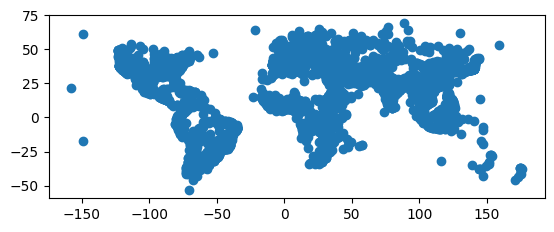

In [12]:
# 繪製點基本圖
cities.plot()

##  讀取 shape 檔

In [13]:
# 點圖層
# 改變目錄
os.chdir(pth+"shape/")
cities = gpd.read_file("world_cities.shp")
cities


no     city      country iso3  population                    geometry
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)
...    ...      ...          ...  ...         ...                         ...
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)

[4708 rows x 6 columns]

## 繪製點圖
* marker= '*', '.','o'

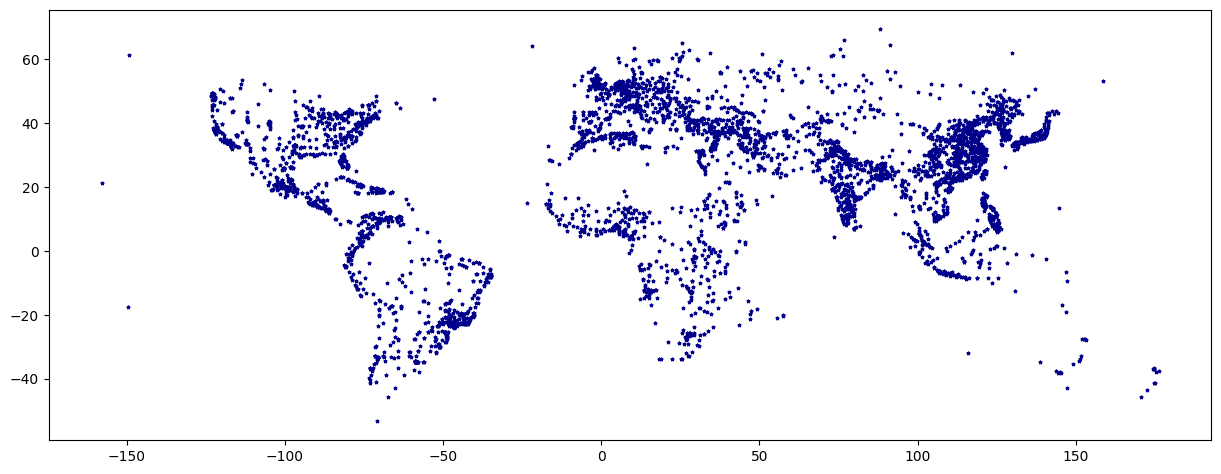

In [14]:
# 圖面大小，點顏色，符號，大小
cities.plot(marker='*', color='darkblue',figsize=(15, 10), markersize=5);

## 變數決定點粒大小

In [67]:
# 增加一個欄位 popu 依其數值決定點粒大小
cities["popu"]=cities["population"]/500000

In [68]:
cities["popu"]

0       75.954000
1       69.080000
2       59.234000
3       46.710000
4       46.176000
          ...    
4703     0.200028
4704     0.200022
4705     0.200000
4706     0.200000
4707     0.200000
Name: popu, Length: 4708, dtype: float64

In [17]:
# 最大值與最小值，與繪圖效果有關
print(max(cities["popu"]))
print (min(cities["popu"]))

75.954
0.2


In [18]:
# 原始的數值
cities["population"]

0       37977000
1       34540000
2       29617000
3       23355000
4       23088000
          ...   
4703      100014
4704      100011
4705      100000
4706      100000
4707      100000
Name: population, Length: 4708, dtype: int64

In [19]:
# 所有欄位檢查
cities

no     city      country iso3  population                    geometry  \
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)   
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)   
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)   
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)   
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)   
...    ...      ...          ...  ...         ...                         ...   
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)   
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)   
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)   
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)   
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)   

           popu  
0     75.954000  
1     69.080000  
2     59.234000  
3     46.710000  
4     46.176000  
...         ...  
4703   0.200028  
4704   0.200022  
4705   0.200000  
4706   0.200000  
4707   0.200000  

[4708 rows x 7 columns]

<Axes: >

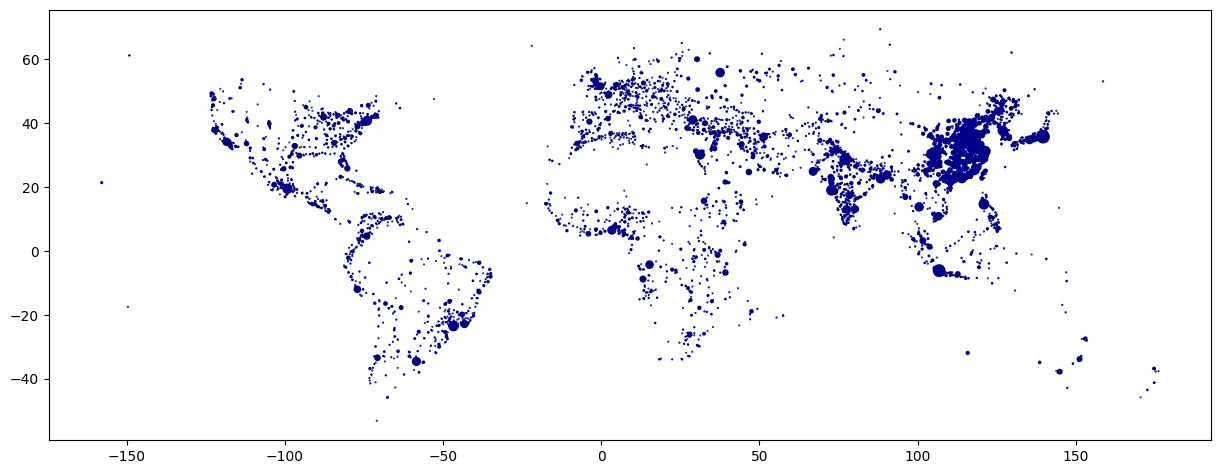

In [20]:
# 依變數大小決定點大小 markersize
cities.plot(figsize=(15, 10),markersize=cities['popu'],color='darkblue')

'\nviridis: 一個從藍色到黃色的顏色映射，廣泛使用，視覺上易於區分。\nplasma: 一個從紫色到黃色的顏色映射。\ninferno: 一個從黑色到黃色的顏色映射。\nmagma: 一個從黑色到白色的顏色映射。\ncividis: 對色盲友好的顏色映射，從藍色到黃色。\nhot: 從黑色到紅色再到黃色和白色。\n'

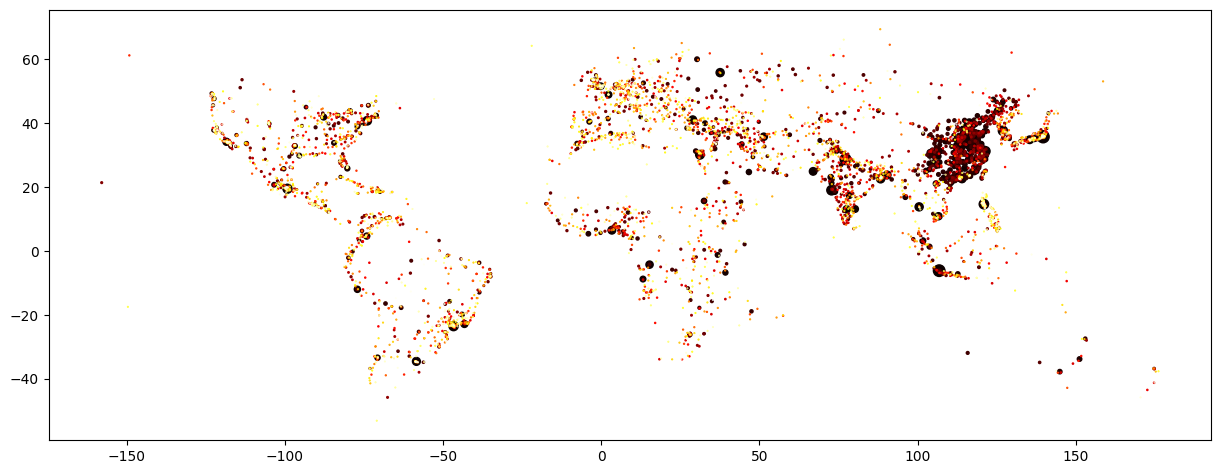

In [21]:
# 改變顏色 cmap # cmap 是 Colormap 的縮寫

colorpick='hot'

cities.plot(figsize=(15, 10), cmap = colorpick, markersize=cities['popu'])

'''
viridis: 一個從藍色到黃色的顏色映射，廣泛使用，視覺上易於區分。
plasma: 一個從紫色到黃色的顏色映射。
inferno: 一個從黑色到黃色的顏色映射。
magma: 一個從黑色到白色的顏色映射。
cividis: 對色盲友好的顏色映射，從藍色到黃色。
hot: 從黑色到紅色再到黃色和白色。
'''

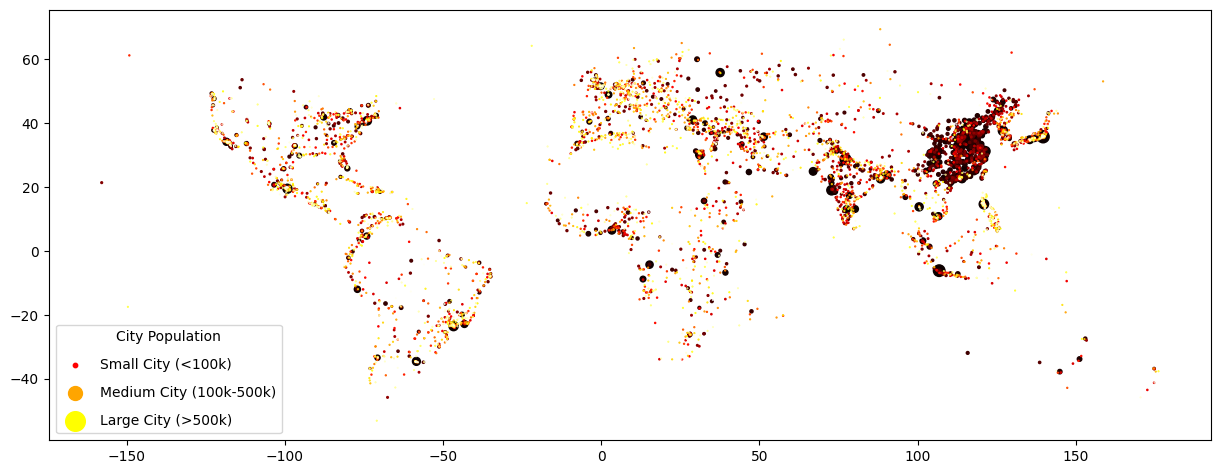

In [22]:
# 創建地圖並設置顏色和標記大小
fig, ax = plt.subplots(figsize=(15, 10)) #創建了一個繪圖對象 fig 和子圖對象 ax。    #figsize=(15, 10) 指定了圖的大小（15 x 10 英寸）。

cities.plot(ax=ax, cmap='hot', markersize=cities['popu'], legend=True)
# 這行代碼繪製了城市地圖：
# ax=ax 指定在上面創建的子圖 ax 上繪圖。
# cmap='hot' 使用 'hot' 顏色映射方案，顏色會隨著 popu 值變化。
# markersize=cities['popu'] 根據人口數量設置標記的大小。
# legend=True 添加圖例。


# 添加圖例
scatter = ax.scatter([], [], s=10, c='red', label='Small City (<100k)')
scatter = ax.scatter([], [], s=100, c='orange', label='Medium City (100k-500k)')
scatter = ax.scatter([], [], s=200, c='yellow', label='Large City (>500k)')
# 這些語句使用 ax.scatter 創建空的散點圖對象，用於圖例：
# [] 表示沒有實際數據點，只是用來在圖例中顯示。
# s 指定標記大小。
# c 指定標記顏色。
# label 指定圖例標籤。



# 顯示圖例
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='City Population')
#scatterpoints=1 設置圖例中標記的數量。
#frameon=True 顯示圖例框。
#labelspacing=1 設置圖例標籤之間的間距。
#title='City Population' 設置圖例的標題。


# 顯示地圖
plt.show()
#顯示最終的地圖。

In [23]:
cities

no     city      country iso3  population                    geometry  \
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)   
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)   
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)   
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)   
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)   
...    ...      ...          ...  ...         ...                         ...   
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)   
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)   
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)   
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)   
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)   

           popu  
0     75.954000  
1     69.080000  
2     59.234000  
3     46.710000  
4     46.176000  
...         ...  
4703   0.200028  
4704   0.200022  
4705   0.200000  
4706   0.200000  
4707   0.200000  

[4708 rows x 7 columns]

## 選取特定國家

<Axes: >

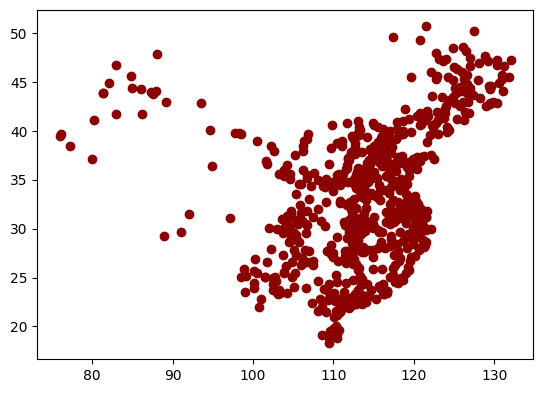

In [24]:
# 篩選某個國家內的城市
china_cities = cities[cities.country == 'China']
china_cities.plot(color="darkred")

In [25]:
# 選擇國家清單
sel=['China','Japan','India']
cities_sel=cities.country.apply(lambda x: x in sel)
cities_sel

0        True
1       False
2        True
3        True
4       False
        ...  
4703    False
4704    False
4705    False
4706    False
4707    False
Name: country, Length: 4708, dtype: bool

In [26]:
cities[cities_sel]

no       city country iso3  population                    geometry  \
0        1      Tokyo   Japan  JPN    37977000  POINT (139.69220 35.68970)   
2        3      Delhi   India  IND    29617000   POINT (77.23000 28.66000)   
3        4     Mumbai   India  IND    23355000   POINT (72.83330 18.96670)   
5        6   Shanghai   China  CHN    22120000  POINT (121.46670 31.16670)   
9       10  Guangzhou   China  CHN    20902000  POINT (113.25900 23.12880)   
...    ...        ...     ...  ...         ...                         ...   
4658  4659  Liancheng   China  CHN      101221  POINT (105.05730 24.05150)   
4666  4667     Sakado   Japan  JPN      100829  POINT (139.40310 35.95720)   
4673  4674     Weifen   China  CHN      100615  POINT (111.12030 38.46330)   
4674  4675    Kalyani   India  IND      100575   POINT (88.43440 22.97500)   
4692  4693    Gangtok   India  IND      100286   POINT (88.62000 27.33000)   

           popu  
0     75.954000  
2     59.234000  
3     46.710000  
5     44.240000  
9     41.804000  
...         ...  
4658   0.202442  
4666   0.201658  
4673   0.201230  
4674   0.201150  
4692   0.200572  

[1163 rows x 7 columns]

<Axes: >

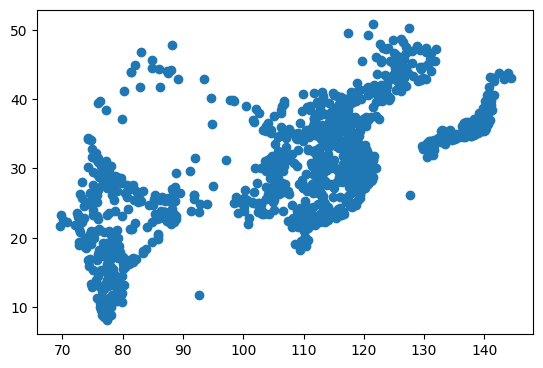

In [27]:
cities[cities_sel].plot()

# 點 buffer
* 週圍一定距離之範圍內，變成面圖層。
* 單位是經緯度，在高緯度地區會變形。

In [28]:
cities

no     city      country iso3  population                    geometry  \
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)   
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)   
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)   
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)   
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)   
...    ...      ...          ...  ...         ...                         ...   
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)   
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)   
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)   
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)   
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)   

           popu  
0     75.954000  
1     69.080000  
2     59.234000  
3     46.710000  
4     46.176000  
...         ...  
4703   0.200028  
4704   0.200022  
4705   0.200000  
4706   0.200000  
4707   0.200000  

[4708 rows x 7 columns]

<Axes: >

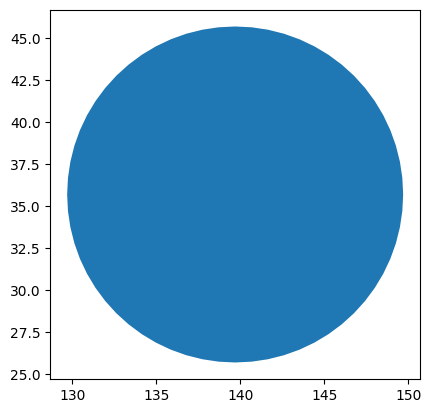

In [29]:
tokyo_buff=gpd.GeoSeries(cities.geometry.iloc[0]).buffer(10) #單位是度（degrees）。10 度的緩衝區
tokyo_buff.plot()

In [30]:
tokyo_buff

0    POLYGON ((149.69220 35.68970, 149.64405 34.709...
dtype: geometry

<ipython-input-78-6befa373c77a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city_buff=gpd.GeoSeries(cities.geometry).buffer(10)


<Axes: >

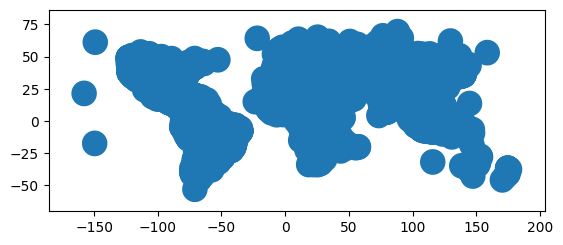

In [78]:
# 全部城市取 buffer
city_buff=gpd.GeoSeries(cities.geometry).buffer(10)
city_buff.plot()

<ipython-input-77-98df4c5ab658>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city10_buff=gpd.GeoSeries(cities.geometry.iloc[:10]).buffer(10)


<Axes: >

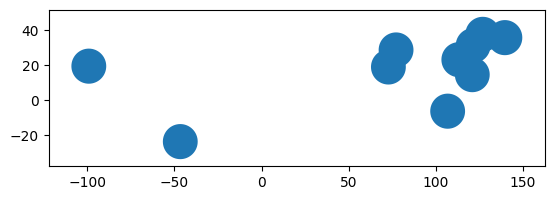

In [77]:
# 前十大城市取 buffer
city10_buff=gpd.GeoSeries(cities.geometry.iloc[:10]).buffer(10)
# cities.geometry.iloc[:10]: 這部分程式碼使用 .iloc[:10] 選擇 geometry 列的前十個元素。
# .iloc 是 Pandas 用於基於位置選擇數據的方法。


city10_buff.plot()

In [33]:
city_buff.crs# 檢查投影型態


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
# 找到 pop 欄位最大的前十個城市
top_10_cities = cities.nlargest(10, 'population')

# 輸出結果，確認選擇正確
print(top_10_cities)


   no         city       country iso3  population  \
0   1        Tokyo         Japan  JPN    37977000   
1   2      Jakarta     Indonesia  IDN    34540000   
2   3        Delhi         India  IND    29617000   
3   4       Mumbai         India  IND    23355000   
4   5       Manila   Philippines  PHL    23088000   
5   6     Shanghai         China  CHN    22120000   
6   7    Sao Paulo        Brazil  BRA    22046000   
7   8        Seoul  Korea, South  KOR    21794000   
8   9  Mexico City        Mexico  MEX    20996000   
9  10    Guangzhou         China  CHN    20902000   

                      geometry    popu  
0   POINT (139.69220 35.68970)  75.954  
1   POINT (106.84510 -6.21460)  69.080  
2    POINT (77.23000 28.66000)  59.234  
3    POINT (72.83330 18.96670)  46.710  
4   POINT (120.98330 14.60000)  46.176  
5   POINT (121.46670 31.16670)  44.240  
6  POINT (-46.63390 -23.55040)  44.092  
7   POINT (126.99000 37.56000)  43.588  
8   POINT (-99.13330 19.43330)  41.992  
9   PO

In [35]:
city10_buff.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## buff 轉成 geopandas

<Axes: >

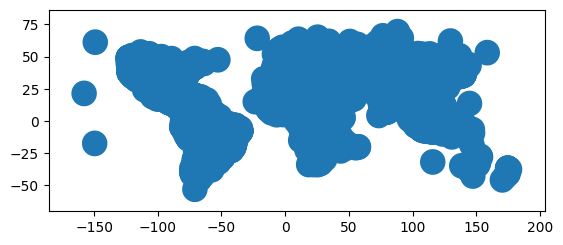

In [36]:
# buff 轉成 geopandas, 以便套圖
crs = city_buff.crs
city_buffer = GeoDataFrame(crs=crs,geometry=city_buff)
city_buffer.plot()

In [37]:
# 增加欄位
city_buffer['population']=cities.population

In [38]:
city_buffer

geometry  population
0     POLYGON ((149.69220 35.68970, 149.64405 34.709...    37977000
1     POLYGON ((116.84510 -6.21460, 116.79695 -7.194...    34540000
2     POLYGON ((87.23000 28.66000, 87.18185 27.67983...    29617000
3     POLYGON ((82.83330 18.96670, 82.78515 17.98653...    23355000
4     POLYGON ((130.98330 14.60000, 130.93515 13.619...    23088000
...                                                 ...         ...
4703  POLYGON ((-34.78000 -4.22500, -34.82815 -5.205...      100014
4704  POLYGON ((14.35940 52.01190, 14.31125 51.03173...      100011
4705  POLYGON ((45.90720 33.84390, 45.85905 32.86373...      100000
4706  POLYGON ((13.18170 50.69010, 13.13355 49.70993...      100000
4707  POLYGON ((17.33000 18.82000, 17.28185 17.83983...      100000

[4708 rows x 2 columns]

<Axes: >

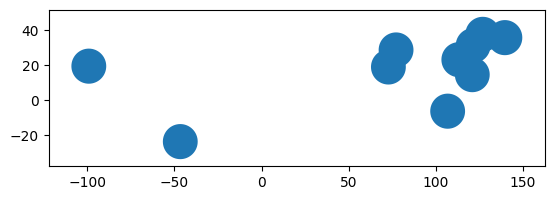

In [39]:
city10_buffer = GeoDataFrame(crs=crs,geometry=city10_buff)
city10_buffer.plot()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

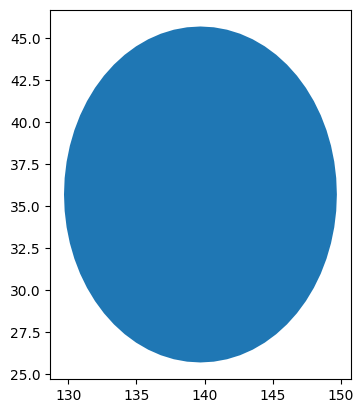

In [80]:
tokyo_buffer = GeoDataFrame(crs=crs,geometry=tokyo_buff)
tokyo_buffer.plot()

# 點圖與面圖層套疊

In [55]:
# 讀取 shape 檔
world = gpd.read_file(path+"shape/countries.shp")

In [56]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    XKS     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [57]:
cities

no     city      country iso3  population                    geometry  \
0        1    Tokyo        Japan  JPN    37977000  POINT (139.69220 35.68970)   
1        2  Jakarta    Indonesia  IDN    34540000  POINT (106.84510 -6.21460)   
2        3    Delhi        India  IND    29617000   POINT (77.23000 28.66000)   
3        4   Mumbai        India  IND    23355000   POINT (72.83330 18.96670)   
4        5   Manila  Philippines  PHL    23088000  POINT (120.98330 14.60000)   
...    ...      ...          ...  ...         ...                         ...   
4703  4704  Bacabal       Brazil  BRA      100014  POINT (-44.78000 -4.22500)   
4704  4705    Delft  Netherlands  NLD      100011    POINT (4.35940 52.01190)   
4705  4706    Zahle      Lebanon  LBN      100000   POINT (35.90720 33.84390)   
4706  4707  Roubaix       France  FRA      100000    POINT (3.18170 50.69010)   
4707  4708    Arlit        Niger  NER      100000    POINT (7.33000 18.82000)   

           popu  
0     75.954000  
1     69.080000  
2     59.234000  
3     46.710000  
4     46.176000  
...         ...  
4703   0.200028  
4704   0.200022  
4705   0.200000  
4706   0.200000  
4707   0.200000  

[4708 rows x 7 columns]

## 檢查投影

In [58]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

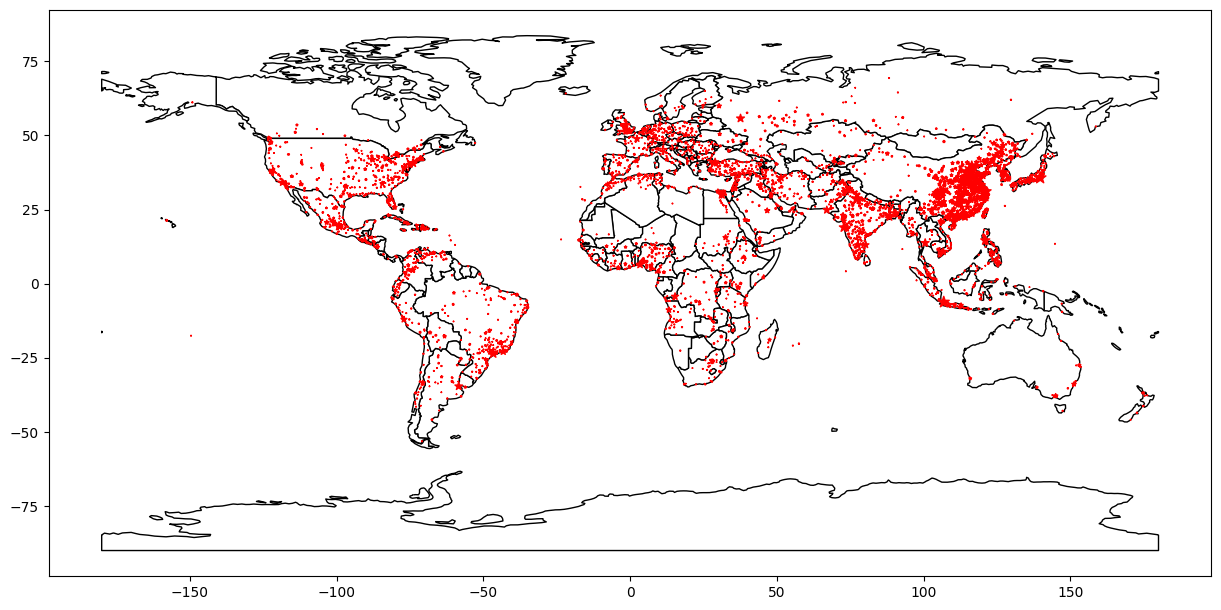

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')
# 底圖是國家
world.plot(ax=ax,color='white',figsize=(15, 10), edgecolor='black')
# 上面是城市
cities.plot(ax=ax, marker='*', color='red',figsize=(15, 10), markersize=cities['popu']);
plt.show()

<Axes: >

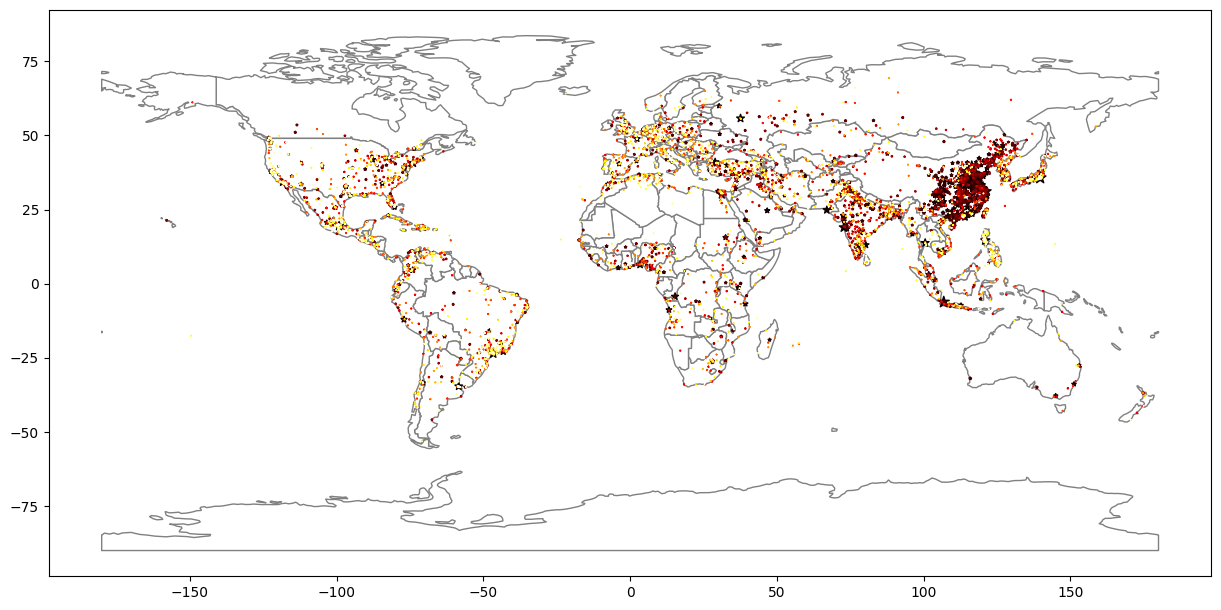

In [75]:
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])

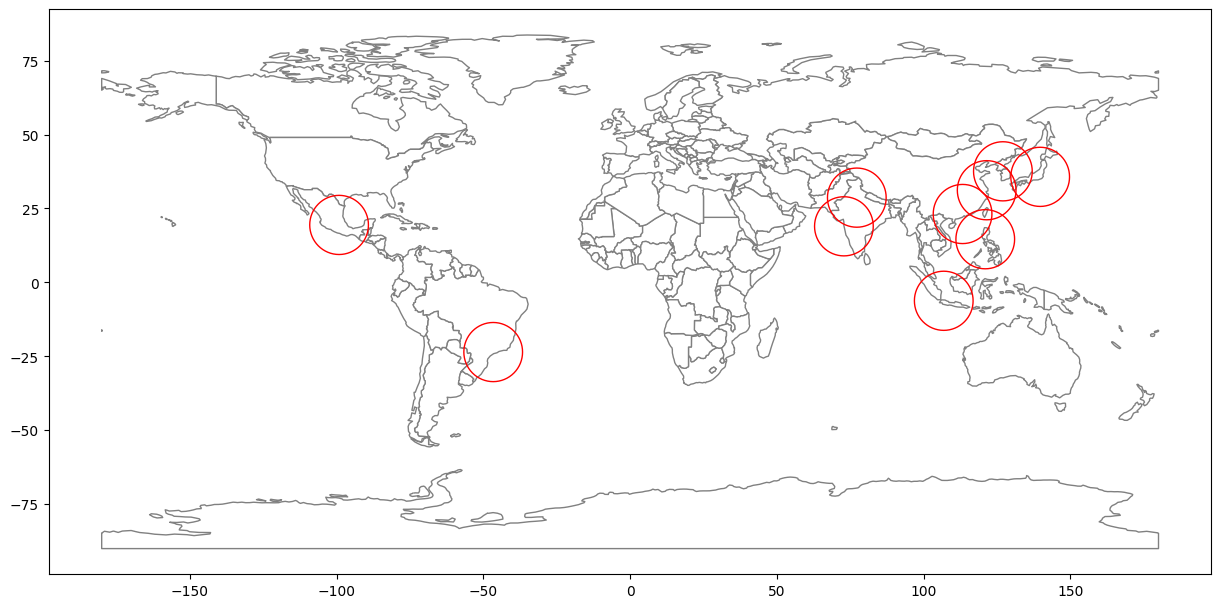

In [74]:
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是 city10 buffer
city10_buffer.plot(ax=base, alpha=1, color='none',edgecolor='red',figsize=(15, 10));


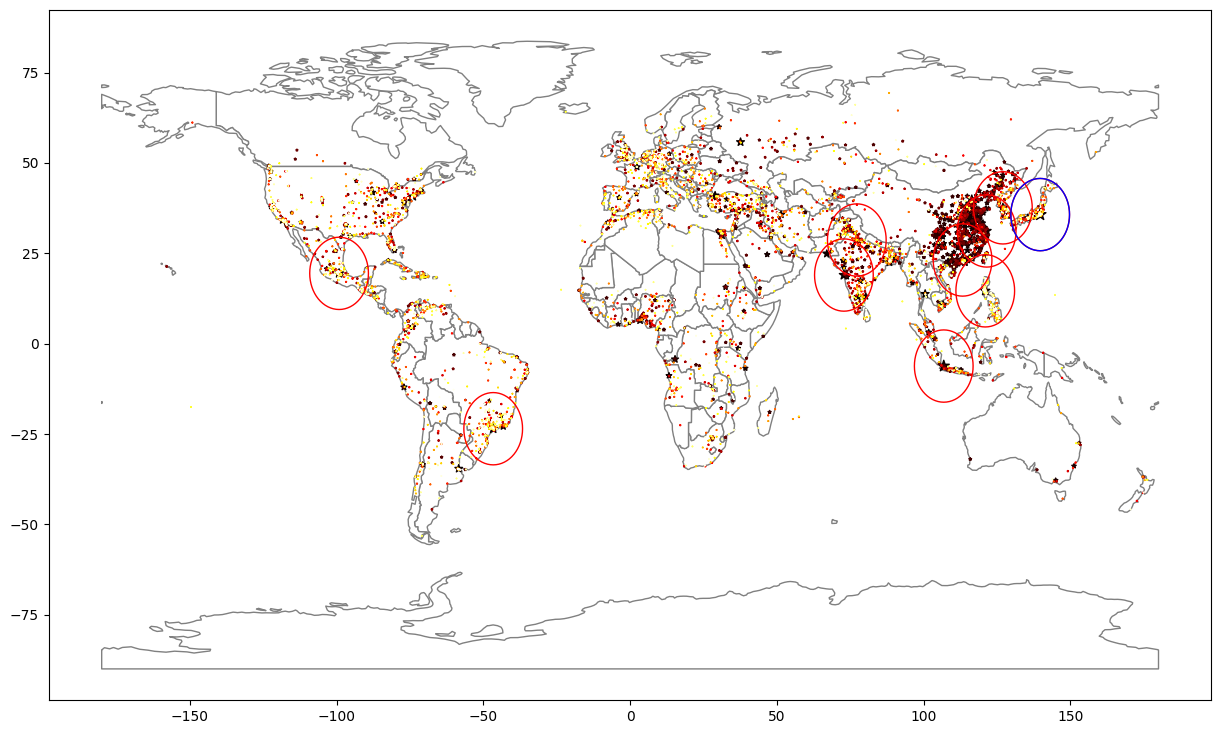

In [81]:
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])
# 上面是 city10 buffer
city10_buff.plot(ax=base, alpha=1, color='none',edgecolor='red',figsize=(15, 10));
# 上面是 tokyo buffer
tokyo_buffer.plot(ax=base, alpha=1, color='none',edgecolor='blue',figsize=(15, 10));

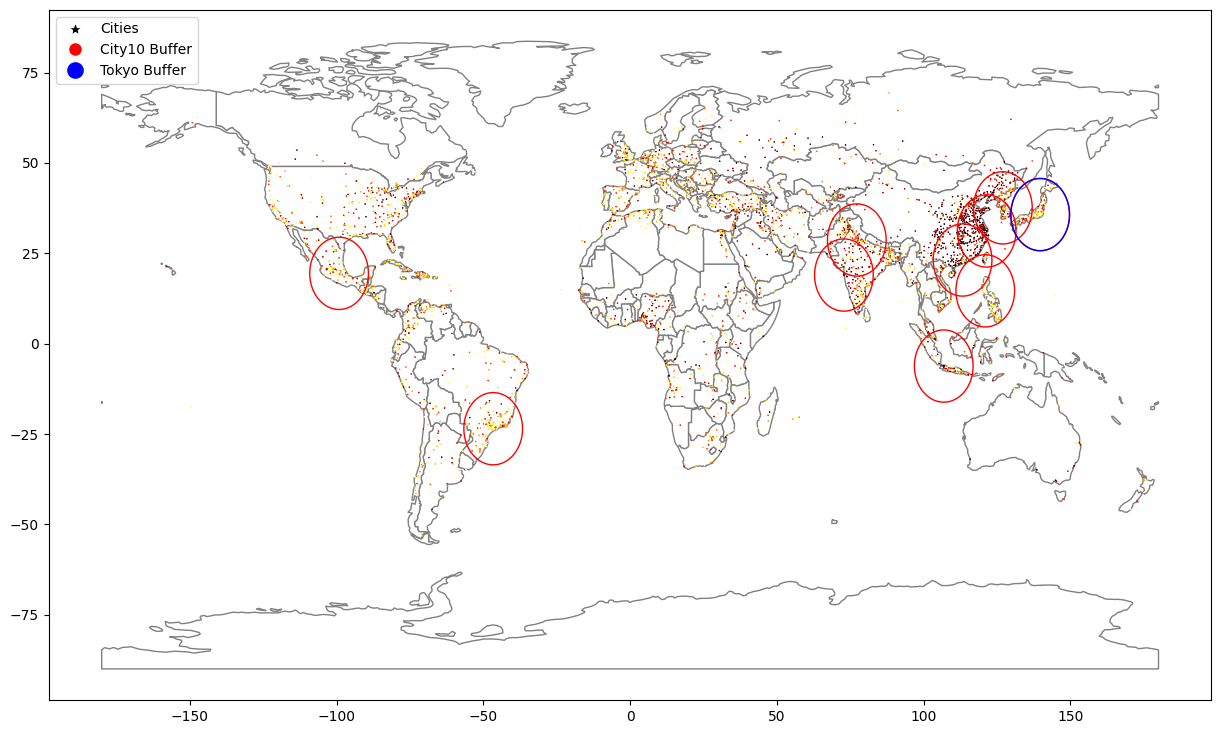

In [84]:
# 加上圖例 Legend
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# 假設這裡的 world 和 cities 是 GeoDataFrame，city10_buff 和 tokyo_buffer 是 GeoSeries

# 底圖是國家
base = world.plot(color='white', edgecolor='gray', figsize=(15, 10))

# 上面是城市
cities.plot(ax=base, marker='*', markersize=cities['popu'] / 10000, cmap='hot', label='Cities')

# 上面是 city10 buffer
city10_buff.plot(ax=base, alpha=1, color='none', edgecolor='red', label='City10 Buffer')

# 上面是 tokyo buffer
tokyo_buffer.plot(ax=base, alpha=1, color='none', edgecolor='blue', label='Tokyo Buffer')

# 創建虛擬點來表示點位和緩衝區的圖例
legend_handles = [
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='Cities'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='City10 Buffer'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Tokyo Buffer', markeredgewidth=2, markeredgecolor='blue')
]

# 顯示圖例
plt.legend(handles=legend_handles, loc='upper left')

# 顯示地圖
plt.show()


# 面轉核心點

In [85]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    XKS     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [86]:
CountryName=world.name

In [87]:
# world 面圖層 核心點
world_centroid = world.centroid

<ipython-input-87-7bbd81a22405>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_centroid = world.centroid


In [88]:
 world_centroid

0      POINT (163.85316 -17.31631)
1        POINT (34.75299 -6.25773)
2       POINT (-12.13783 24.29117)
3       POINT (-98.14238 61.46908)
4      POINT (-112.59944 45.70563)
                  ...             
172      POINT (20.81965 44.23304)
173      POINT (19.28618 42.78904)
174      POINT (20.89536 42.57937)
175     POINT (-61.33037 10.42824)
176       POINT (30.19862 7.29289)
Length: 177, dtype: geometry

<Axes: >

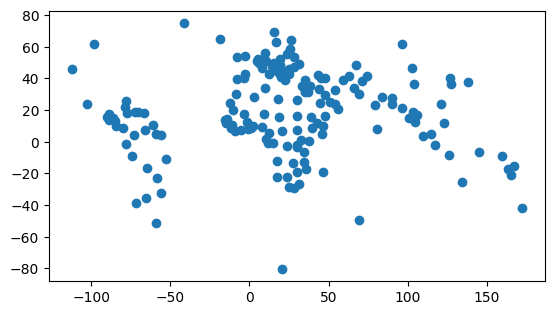

In [89]:
world_centroid.plot()

## 轉成 geopandas

In [90]:
# 核心點，無其他欄位資訊
centroid = gpd.GeoDataFrame(world_centroid,columns=["geometry"])
centroid

geometry
0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
..                           ...
172    POINT (20.81965 44.23304)
173    POINT (19.28618 42.78904)
174    POINT (20.89536 42.57937)
175   POINT (-61.33037 10.42824)
176     POINT (30.19862 7.29289)

[177 rows x 1 columns]

## 增加欄位

In [91]:
len(centroid)

177

In [92]:
len(world)

177

In [93]:
len(CountryName)

177

In [94]:
centroid["CountyName"]=CountryName
centroid

geometry                CountyName
0    POINT (163.85316 -17.31631)                      Fiji
1      POINT (34.75299 -6.25773)                  Tanzania
2     POINT (-12.13783 24.29117)                 W. Sahara
3     POINT (-98.14238 61.46908)                    Canada
4    POINT (-112.59944 45.70563)  United States of America
..                           ...                       ...
172    POINT (20.81965 44.23304)                    Serbia
173    POINT (19.28618 42.78904)                Montenegro
174    POINT (20.89536 42.57937)                    Kosovo
175   POINT (-61.33037 10.42824)       Trinidad and Tobago
176     POINT (30.19862 7.29289)                  S. Sudan

[177 rows x 2 columns]

In [95]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [96]:
centroid['isoa3']=world.iso_a3
centroid

geometry                CountyName isoa3
0    POINT (163.85316 -17.31631)                      Fiji   FJI
1      POINT (34.75299 -6.25773)                  Tanzania   TZA
2     POINT (-12.13783 24.29117)                 W. Sahara   ESH
3     POINT (-98.14238 61.46908)                    Canada   CAN
4    POINT (-112.59944 45.70563)  United States of America   USA
..                           ...                       ...   ...
172    POINT (20.81965 44.23304)                    Serbia   SRB
173    POINT (19.28618 42.78904)                Montenegro   MNE
174    POINT (20.89536 42.57937)                    Kosovo   XKS
175   POINT (-61.33037 10.42824)       Trinidad and Tobago   TTO
176     POINT (30.19862 7.29289)                  S. Sudan   SSD

[177 rows x 3 columns]

In [97]:
centroid['population']=world.pop_est
centroid

geometry                CountyName isoa3  population
0    POINT (163.85316 -17.31631)                      Fiji   FJI      920938
1      POINT (34.75299 -6.25773)                  Tanzania   TZA    53950935
2     POINT (-12.13783 24.29117)                 W. Sahara   ESH      603253
3     POINT (-98.14238 61.46908)                    Canada   CAN    35623680
4    POINT (-112.59944 45.70563)  United States of America   USA   326625791
..                           ...                       ...   ...         ...
172    POINT (20.81965 44.23304)                    Serbia   SRB     7111024
173    POINT (19.28618 42.78904)                Montenegro   MNE      642550
174    POINT (20.89536 42.57937)                    Kosovo   XKS     1895250
175   POINT (-61.33037 10.42824)       Trinidad and Tobago   TTO     1218208
176     POINT (30.19862 7.29289)                  S. Sudan   SSD    13026129

[177 rows x 4 columns]

<Axes: >

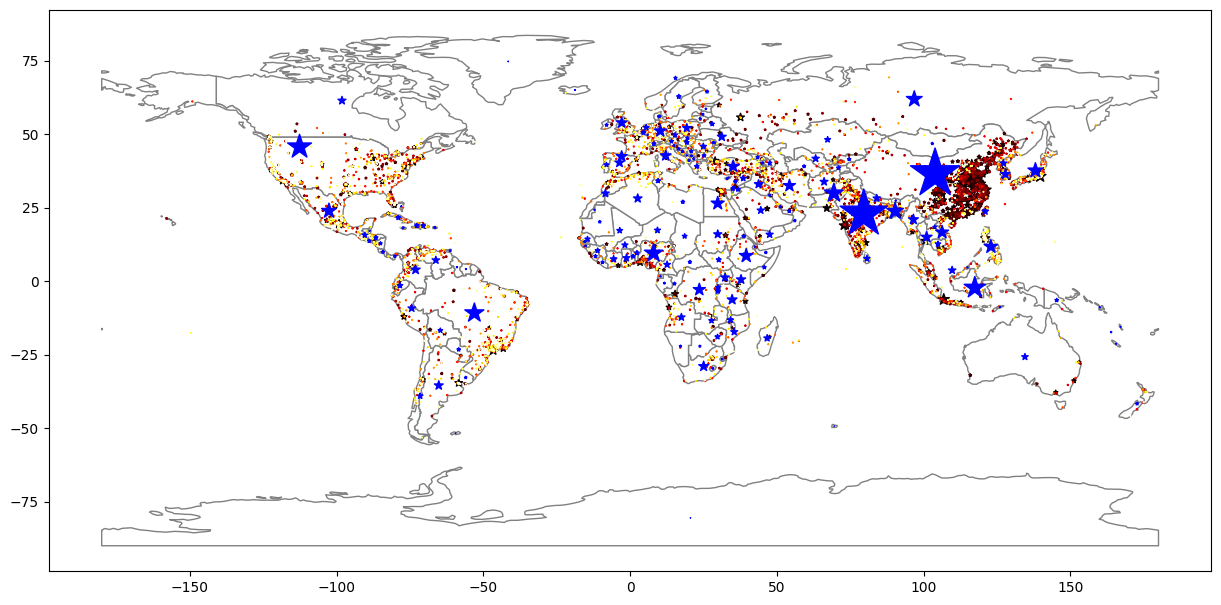

In [98]:
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])
# 上面是國家的核心點，人口數
centroid.plot(ax=base,marker='*', color = 'blue', markersize=centroid['population']/1000000)

# 切出某個區域 clip()


## 面圖層切點圖層

In [99]:
from shapely.geometry import Polygon

In [100]:
china = world[world["name"] == "China"]
# 用經緯度定義一個範圍
polygon = Polygon([(40, 10), (40, 70), (170, 70), (170, 10), (40, 10)])
# geopandas, 定義投影，與 world 相同
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

In [101]:
poly_gdf

0                                           geometry
0  1  POLYGON ((40.00000 10.00000, 40.00000 70.00000...

<Axes: >

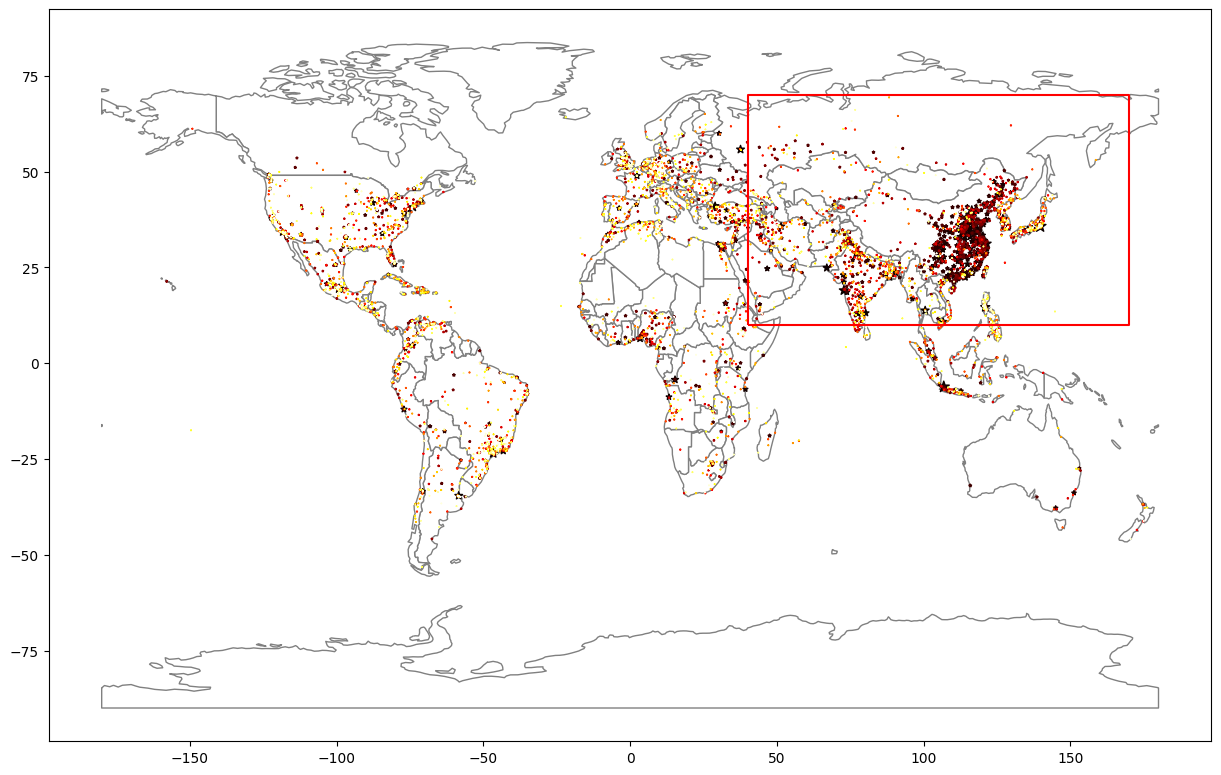

In [102]:
# 圖層套疊
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])
# 再加上方框
poly_gdf.boundary.plot(ax=base,color="red")


<Axes: >

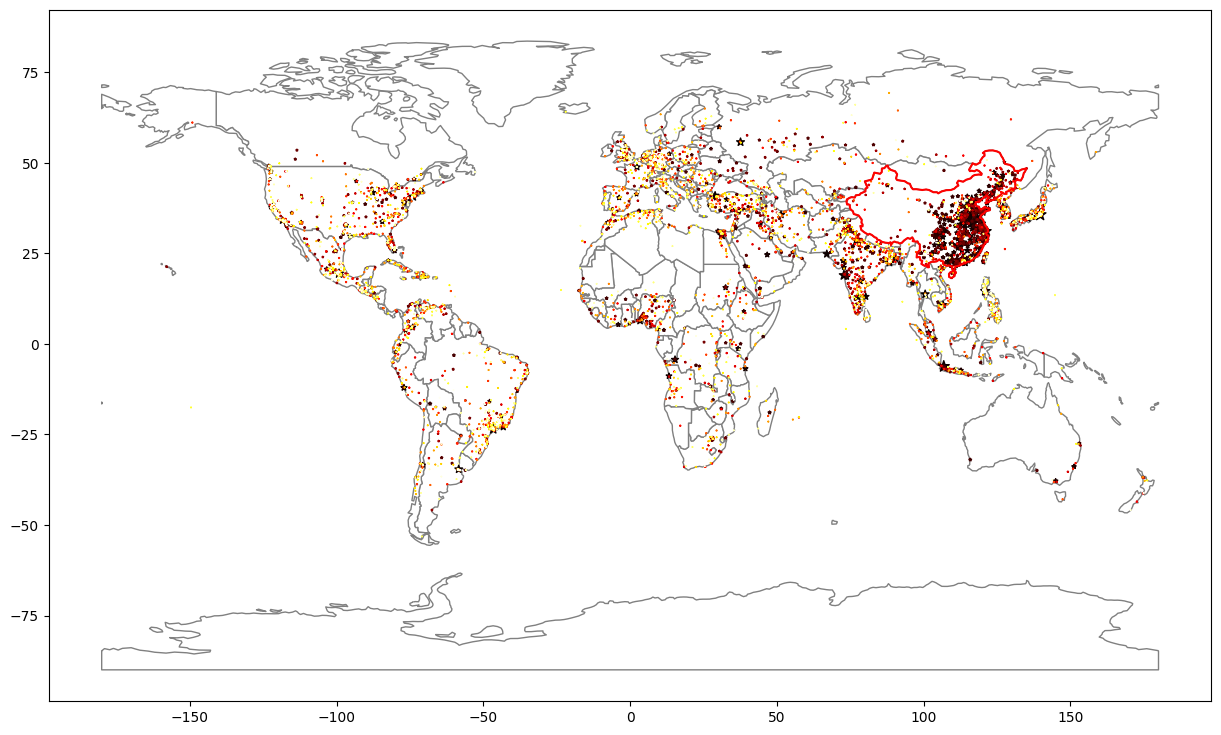

In [103]:
# world.plot(ax=ax1)
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])
# 再加上中國的邊界
china.boundary.plot(ax=base,color="red")

<Axes: >

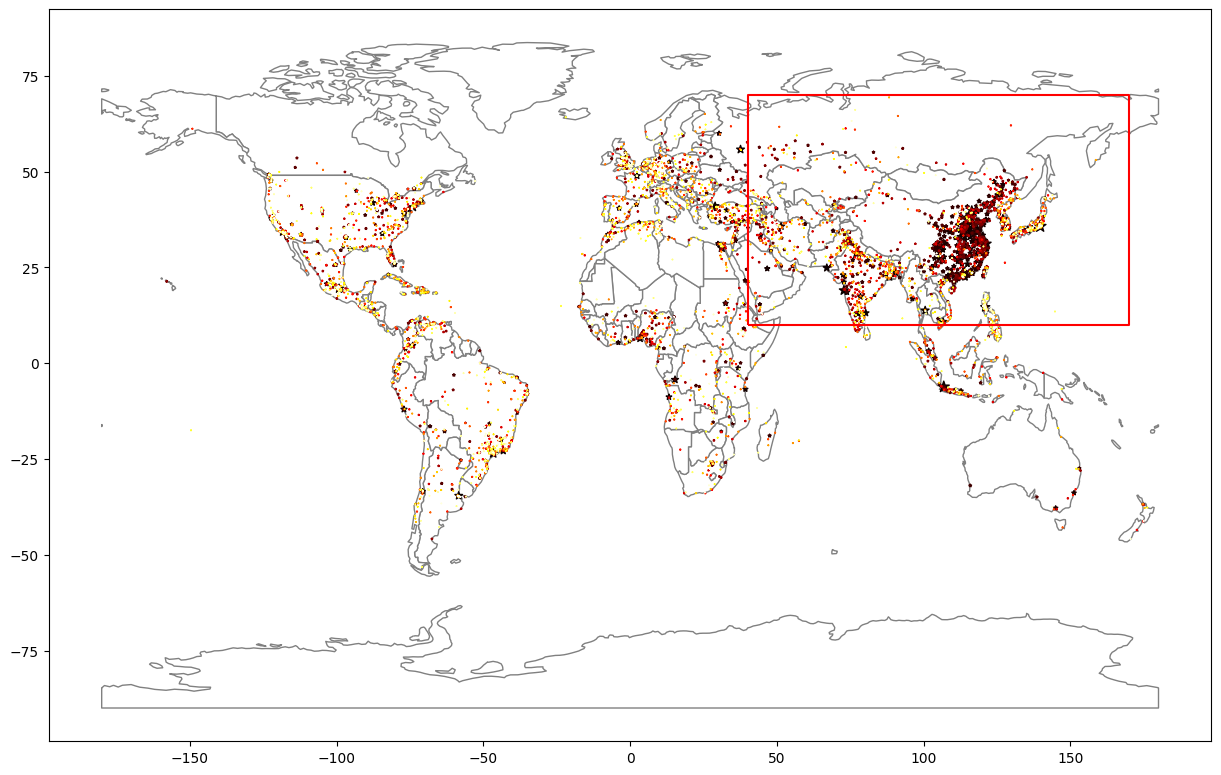

In [104]:
# world.plot(ax=ax1)
# 底圖是國家
base = world.plot(color='white', edgecolor='gray',figsize=(15, 10))
# 上面是城市
cities.plot(ax=base,figsize=(15, 10),marker='*', cmap = 'hot', markersize=cities['popu'])
poly_gdf.boundary.plot(ax=base,color="red")

<Axes: >

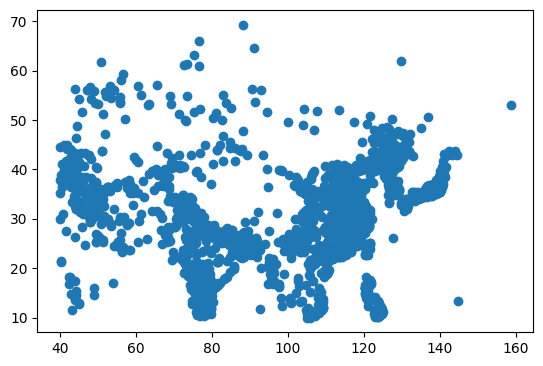

In [105]:
# 面圖層polygon 切點圖層 cities
poly_cities = cities.clip(polygon)
poly_cities.plot()

<Axes: >

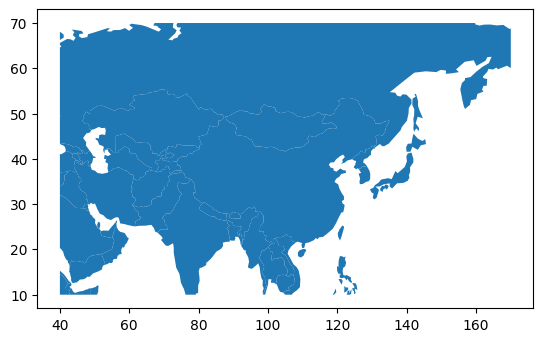

In [106]:
# 面圖層polygon 切面圖層 world
poly_world = world.clip(polygon)
poly_world.plot()

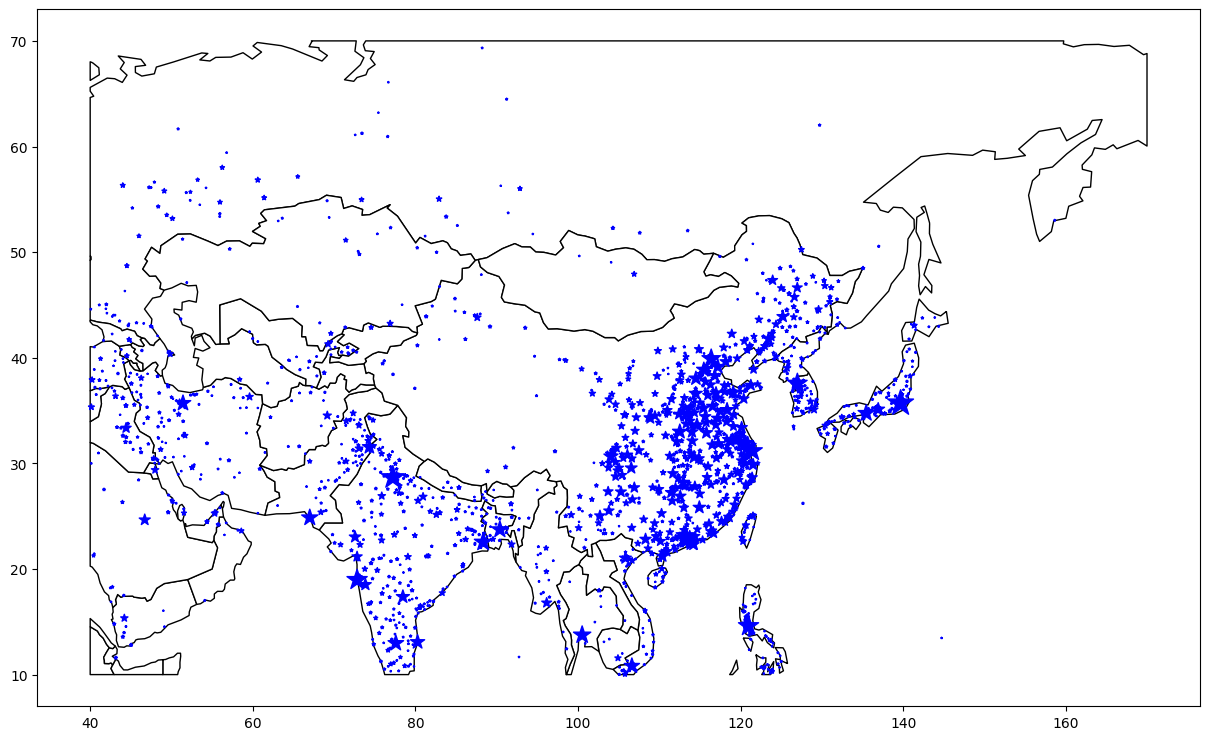

In [107]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')
# 底圖是國家
poly_world.plot(ax=ax,color='white',figsize=(15, 10), edgecolor='black')
# 上面是城市
poly_cities.plot(ax=ax, marker='*', color='blue',figsize=(15, 10), markersize=poly_cities['popu']*5);
plt.show()

# spatial join
* https://geopandas.org/en/latest/docs/user_guide/mergingdata.html
* https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin_nearest.html#geopandas.GeoDataFrame.sjoin_nearest
* https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html
* https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html#geopandas.sjoin

## 點讀取面資訊

In [108]:
# 點圖層
cities.columns

Index(['no', 'city', 'country', 'iso3', 'population', 'geometry', 'popu'], dtype='object')

In [109]:
# 面圖層
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

## Sjoin
* predicate='contains'    a.sjoin.b    表示 a 在 b 裡面
* predicate='within'      a.sjoin.b    表示 b 在 a 裡面

In [124]:
# sjoin, left 左邊的地理單元全部保留，無對應者 NaN
gdf_left=cities.sjoin(world, how="left", predicate="within")
gdf_left

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2177: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


no_left     city      country iso3  population  \
0           1    Tokyo        Japan  JPN    37977000   
1           2  Jakarta    Indonesia  IDN    34540000   
2           3    Delhi        India  IND    29617000   
3           4   Mumbai        India  IND    23355000   
4           5   Manila  Philippines  PHL    23088000   
...       ...      ...          ...  ...         ...   
4703     4704  Bacabal       Brazil  BRA      100014   
4704     4705    Delft  Netherlands  NLD      100011   
4705     4706    Zahle      Lebanon  LBN      100000   
4706     4707  Roubaix       France  FRA      100000   
4707     4708    Arlit        Niger  NER      100000   

                        geometry  popu_left  index_right       pop_est  \
0     POINT (139.69220 35.68970)  75.954000        155.0  1.264514e+08   
1     POINT (106.84510 -6.21460)  69.080000          8.0  2.605807e+08   
2      POINT (77.23000 28.66000)  59.234000         98.0  1.281936e+09   
3      POINT (72.83330 18.96670)  46.710000          NaN           NaN   
4     POINT (120.98330 14.60000)  46.176000        147.0  1.042561e+08   
...                          ...        ...          ...           ...   
4703  POINT (-44.78000 -4.22500)   0.200028         29.0  2.073534e+08   
4704    POINT (4.35940 52.01190)   0.200022        130.0  1.708472e+07   
4705   POINT (35.90720 33.84390)   0.200000         77.0  6.229794e+06   
4706    POINT (3.18170 50.69010)   0.200000         43.0  6.710616e+07   
4707    POINT (7.33000 18.82000)   0.200000         55.0  1.924534e+07   

          continent  ...    demo cate     edu       area_y  region  eco_dev  \
0              Asia  ...  0.7126  3.0  11.000   377975.000    12.0     1.50   
1              Asia  ...  0.4652  2.0     NaN  1890541.851    13.0     0.04   
2              Asia  ...  0.3188  2.0   4.840  3166803.189    14.0     0.06   
3               NaN  ...     NaN  NaN     NaN          NaN     NaN      NaN   
4              Asia  ...  0.3166  2.0   8.240   294201.601    13.0     0.05   
...             ...  ...     ...  ...     ...          ...     ...      ...   
4703  South America  ...  0.4748  2.0   8.140  8523619.571    18.0     0.01   
4704         Europe  ...  0.7770  3.0  11.530    35485.575     1.0     0.02   
4705           Asia  ...  0.3206  2.0   8.725    10240.234    10.0    -0.02   
4706         Europe  ...  0.7698  3.0  12.460   547871.255     1.0     0.02   
4707         Africa  ...  0.4080  2.0   1.310  1188522.525     6.0     0.03   

         gdp_c ferti   life    popu_right  
0     42928.00  1.46  83.84  1.270947e+08  
1     11851.74  2.31  71.70  2.676634e+08  
2      6806.50  2.22  69.20  1.352617e+09  
3          NaN   NaN    NaN           NaN  
4      8139.14  2.58  69.90  1.066519e+08  
...        ...   ...    ...           ...  
4703  14033.57  1.73  75.70  2.094693e+08  
4704  47474.11  1.59  81.70  1.723102e+07  
4705  12558.97  2.09  78.00  6.848925e+06  
4706  38515.92  1.88  83.00  6.698724e+07  
4707    964.66  6.91  62.80  2.244295e+07  

[4708 rows x 34 columns]